In [1]:
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.SIM928_voltage_source import SIM # as DC
from nanodrivers.visa_drivers.vna import VNA

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift


#file_store
import os

#time
import time
from datetime import datetime, timedelta


from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_7'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_6 already exists


In [6]:
dc = SIM()
dc.idn()

Connection exist: Stanford_Research_Systems,SIM928,s/n004757,ver1.1



In [5]:
dc.disconnect()

SIM928 is now disconnected from SIM900 mainframe


In [7]:
vna = VNA()
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [11]:
anapico = ANAPICO()
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,1.0.7



# Rough gain sweep

In [12]:
from TWPA_scearch_best_gain import *

In [13]:
TWPA = TWPA_best_gain(file_path = adress, file_name = 'Rough_gain_sweep_high_temp', 
                      vna = vna, anapico = anapico, dc = dc,
                      gain_threshold=18,
                      temp=200)

In [9]:
mat = TWPA.load_database(folder_address=adress, last_one = True)

Database from the file 
   C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_6\1st_tone.mat  
uploaded


KeyError: 'best_gain_DC'

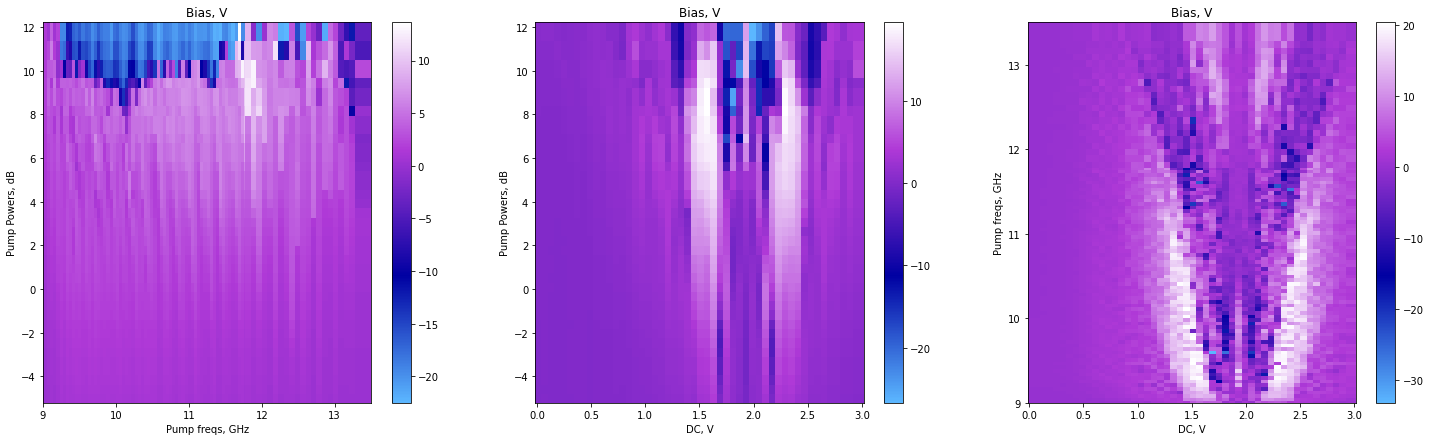

In [49]:
%matplotlib inline
TWPA.plot_database(30,60,20)
# print(TWPA.database['pump_powers'][175])
# print(TWPA.database['volts'][-1])
# print(TWPA.database['pump_freqs'][100]/1e9)

In [45]:
TWPA.min_dc = 0
TWPA.max_dc = 3
TWPA.min_pump_power=-10
TWPA.max_pump_power=12
TWPA.min_pump_freq=12e9
TWPA.max_pump_freq=13.5e9

In [46]:
TWPA.sweep_database(dc_nop=51, pp_nop=51, pf_nop=21, conditional_gain_tr=-10)

Script started at 2025-04-17 12:52:37


New DC set to 0.0 V
Range DC[0.00] = [0.00, 0.06], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00] --> -0.3679

New DC set to 0.06 V
Range DC[0.06] = [0.00, 0.12], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00] --> -0.3452

New DC set to 0.12 V
Range DC[0.12] = [0.06, 0.18], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00] --> -0.3561

New DC set to 0.18 V
Range DC[0.18] = [0.12, 0.24], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00] --> -0.4386

New DC set to 0.24 V
Range DC[0.24] = [0.18, 0.30], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00] --> -0.4577

New DC set to 0.3 V
Range DC[0.30] = [0.24, 0.36], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00] --> -0.3193

New DC set to 0.36 V
Range DC[0.36] = [0.30, 0.42], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00] --> 0.36301

New DC set to 0.42 V
Range DC[0.42] = [0.36, 0.48], PF[13.50] = [13.28, 13.50], PP[12.0000] = [11.58, 12.00]

                        |TWPA GAIN-NOISE sweep has been set |
                        |                                   |
                        v                                   v

In [ ]:
TWPA.sweep_noise(gain_tr=8, dc_range=[1.4, 3, 31], 
            pf_range=[9e9,13e9,71], 
            pp_range=[-5,10,11], file_name='Noise_sweep_200mK_faster')



Script started at 2025-04-19 20:58:55


New DC set to 1.4 V
8.2469 --> 0.00352
10.5749 --> 4.12961
12.94163 --> 0.60251
12.96309 --> 6.54648
8.52325 --> 3.03713
11.22432 --> 1.82784
12.74833 --> 1.36229
13.89684 --> 6.11291
14.10093 --> 6.55681
10.99691 --> -0.06214
13.10418 --> 4.89283
14.92069 --> 5.80765
15.43094 --> 6.77307
13.96552 --> 8.37133
8.88933 --> 3.8891, 6, 6)] with gain 8.37133 started at 2025-04-19 20:59:04
11.31535 --> 5.60861
13.20011 --> 8.41326
13.72669 --> 11.61256, 4)] with gain 8.41326 started at 2025-04-19 21:02:36
14.17334 --> 13.14727, 5)] with gain 11.61256 started at 2025-04-19 21:06:08
11.72338 --> 16.99372, 6)] with gain 13.1472 started at 2025-04-19 21:09:39
8.42403 --> 5.07104 7, 7)] with gain 16.99372 started at 2025-04-19 21:13:11
10.61136 --> 10.01782
13.25876 --> 14.14796, 3)] with gain 10.01782 started at 2025-04-19 21:16:43
13.67964 --> 15.48716, 4)] with gain 14.14796 started at 2025-04-19 21:20:14
14.01927 --> 16.98453, 5)] with gain 15.48716 sta

9.48354 --> 0.00482
8.41002 --> 2.53001
11.33343 --> 2.75851
14.39818 --> 2.24133
14.27139 --> 2.29217
8.24385 --> 1.94545
10.34775 --> 1.60221
10.90466 --> 1.38012
11.44267 --> 1.002
13.8607 --> 0.27182
15.91325 --> 5.03407
8.67484 --> 1.02492
10.12427 --> 2.05634
10.57868 --> 3.44616
11.03709 --> 4.77861
13.37349 --> 7.43839
14.43732 --> 11.96741
9.42649 --> 3.21982 3, 8)] with gain 11.96741 started at 2025-04-20 08:41:11
11.52048 --> 4.01006
12.08008 --> 4.52291
12.9295 --> 5.19276
15.49526 --> 10.479
13.80203 --> 13.14608, 7)] with gain 10.479 started at 2025-04-20 08:44:43
9.50557 --> 3.07543 4, 8)] with gain 13.14608 started at 2025-04-20 08:48:15
12.05637 --> 5.45066
13.48333 --> 7.08323
14.32412 --> 9.22706
14.66245 --> 10.13837, 4)] with gain 9.22706 started at 2025-04-20 08:51:47
14.94279 --> 11.01059, 5)] with gain 10.13837 started at 2025-04-20 08:55:19
15.07273 --> 13.76674, 6)] with gain 11.01059 started at 2025-04-20 08:58:51
9.97818 --> 8.99125 5, 7)] with gain 13.76674

11.32072 --> 9.291962, 5)] with gain 8.38558 started at 2025-04-20 20:02:08
15.42513 --> 11.54107, 6)] with gain 9.29196 started at 2025-04-20 20:05:40
17.75363 --> 13.62169, 7)] with gain 11.54107 started at 2025-04-20 20:09:11
16.63708 --> 6.755852, 8)] with gain 13.62169 started at 2025-04-20 20:12:43
8.66062 --> 6.05193
11.24485 --> 8.08758
13.20704 --> 9.636133, 3)] with gain 8.08758 started at 2025-04-20 20:16:15
13.74302 --> 10.14983, 4)] with gain 9.63613 started at 2025-04-20 20:19:47
14.29471 --> 10.96511, 5)] with gain 10.14983 started at 2025-04-20 20:23:19
15.91707 --> 12.58673, 6)] with gain 10.96511 started at 2025-04-20 20:26:50
16.58901 --> 14.88904, 7)] with gain 12.5867 started at 2025-04-20 20:30:22
15.10204 --> 6.062713, 8)] with gain 14.88904 started at 2025-04-20 20:33:53
8.25027 --> 4.81156
10.56816 --> 6.50246
11.82383 --> 7.97425
11.9321 --> 8.6135
12.5156 --> 9.6424, 4, 5)] with gain 8.6135 started at 2025-04-20 20:37:26
15.48271 --> 11.83319, 6)] with gain 9

18.98087 --> 15.42303, 6)] with gain 16.17095 started at 2025-04-21 07:44:16
8.92152 --> 7.43264 5, 7)] with gain 15.42303 started at 2025-04-21 07:47:47
12.47026 --> 10.80096
14.20966 --> 14.40813, 1)] with gain 10.80096 started at 2025-04-21 07:51:19
16.67699 --> 16.62323, 2)] with gain 14.40813 started at 2025-04-21 07:54:51
18.09339 --> 18.28691, 3)] with gain 16.62323 started at 2025-04-21 07:58:22
18.00867 --> 18.92975, 4)] with gain 18.28691 started at 2025-04-21 08:01:54
17.48689 --> 19.41236, 5)] with gain 18.92975 started at 2025-04-21 08:05:26
18.69391 --> 19.34997, 6)] with gain 19.41236 started at 2025-04-21 08:08:57
8.07062 --> 4.1227, 6, 7)] with gain 19.34997 started at 2025-04-21 08:12:29
10.72257 --> 9.70286
14.65134 --> 12.63662, 1)] with gain 9.70286 started at 2025-04-21 08:16:01
17.15143 --> 14.58473, 2)] with gain 12.63662 started at 2025-04-21 08:19:32
18.10492 --> 16.61646, 3)] with gain 14.58473 started at 2025-04-21 08:23:04
18.265 --> 16.8973, 7, 4)] with ga

11.74286 --> 3.80296
12.28281 --> 3.22936
12.65667 --> 2.19943
8.43374 --> 7.05325
8.43374 --> 9.40186
9.83752 --> 7.02314 67, 6)] with gain 9.40186 started at 2025-04-21 18:12:53
11.99486 --> 8.2574
12.36228 --> 8.6822968, 4)] with gain 8.2574 started at 2025-04-21 18:16:24
12.84346 --> 9.4728368, 5)] with gain 8.68229 started at 2025-04-21 18:19:56
10.91862 --> 7.1761468, 6)] with gain 9.47283 started at 2025-04-21 18:23:28
11.23058 --> 9.25283
11.9647 --> 10.6108369, 4)] with gain 9.25283 started at 2025-04-21 18:27:00
12.77255 --> 11.514089, 5)] with gain 10.61083 started at 2025-04-21 18:30:31
14.43036 --> 8.3029869, 6)] with gain 11.51408 started at 2025-04-21 18:34:03
8.24074 --> 7.41737 69, 7)] with gain 8.30298 started at 2025-04-21 18:37:34
11.57526 --> 8.82113
12.07323 --> 9.1167270, 4)] with gain 8.82113 started at 2025-04-21 18:41:06
12.49084 --> 9.4750370, 5)] with gain 9.11672 started at 2025-04-21 18:44:38
13.29242 --> 4.3936270, 6)] with gain 9.47503 started at 2025-04

12.46017 --> 10.554792, 4)] with gain 9.50839 started at 2025-04-22 02:00:35
13.14777 --> 11.817072, 5)] with gain 10.55479 started at 2025-04-22 02:04:06
15.99503 --> 14.018412, 6)] with gain 11.81707 started at 2025-04-22 02:07:38
17.41003 --> 17.215062, 7)] with gain 14.01841 started at 2025-04-22 02:11:09
15.08456 --> 19.2193 2, 8)] with gain 17.21506 started at 2025-04-22 02:14:41
9.09344 --> 7.94708, 2, 9)] with gain 19.2193 started at 2025-04-22 02:18:13
11.85485 --> 10.43473
14.01757 --> 12.347073, 3)] with gain 10.43473 started at 2025-04-22 02:21:44
14.50854 --> 13.019733, 4)] with gain 12.34707 started at 2025-04-22 02:25:16
14.88482 --> 13.860533, 5)] with gain 13.01973 started at 2025-04-22 02:28:48
16.86156 --> 15.276, 3, 6)] with gain 13.86053 started at 2025-04-22 02:32:19
18.66803 --> 17.544253, 7)] with gain 15.276 started at 2025-04-22 02:35:51
15.31827 --> 17.724343, 8)] with gain 17.54425 started at 2025-04-22 02:39:23
10.3262 --> 7.11374, 3, 9)] with gain 17.72434

In [ ]:
# till 13:50 21/04 -- 182 mK
# then 354 mK 